<a href="https://colab.research.google.com/github/kazuekitamura/kazuekitamura/blob/master/terro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 重回帰分析

## 実現したいこと
経済生産、社会的支援、平均寿命、自由、腐敗がない、寛大さという6つの要素などのカテゴリごとの評価（**観測変数**）を使って、幸福度評価（**観測変数**）を説明すること

### 分析手法
重回帰分析

### 使用するデータの概要
#### Chapter5 重回帰分析用のデータセット
--[archive_2019.csv](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv)
--[archive_2018.csv](https://www.kaggle.com/unsdsn/world-happiness?select=2018.csv)

#### テーブル定義
|物理名|論理名|値|データ型|分類|v1|v2|v3|
|:--|:--|:--|:--|:--|-:-|-:-|-:-|
|Overall rank|総合順位|||今回は使用しない|-|-|-|
|Country or region|国または地域|任意の国または地域|str|今回は使用しない||-|-|
|Score|得点|0~10|float64|目的変数|-|-|-|
|GDP per capita|一人当たりGDP|0~|float64|説明変数|-|-|-|
|Social support|社会的支援に関する評価|0~|float64|説明変数|-|-|-|
|Healthy life expectancy|健康寿命|0~|float64|説明変数|-|-|-|
|Freedom to make life choices|人生の選択の自由に関する評価|0~|float64|説明変数|-|-|-|
|Generosity|寛大さに関する評価|0~|float64|説明変数|-|-|-|
|Perceptions of corruption|腐敗に対する認識に関する評価|1~10|float64|説明変数|-|-|-|


In [ ]:
# データを扱うためのライブラリ
import pandas as pd
import numpy as np

In [ ]:
# 行数、桁数の表示を設定する
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
# 小数点以下の桁数の設定
pd.set_option('display.float_format', '{:.3f}'.format)

In [ ]:
#データの読み込み
df = pd.read_csv('archive.csv')

In [ ]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.000,1.900,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.030,1.100,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.000,1.300,129,1,1,7,1


正しく読み込めました

In [ ]:
df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,311.000,311.000,311.000,311.000,311.000,311.000,311.000
mean,5.387,0.894,1.212,0.661,0.424,0.183,0.111
std,1.114,0.389,0.300,0.253,0.156,0.097,0.095
min,2.853,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.513,0.608,1.057,0.487,0.326,0.108,0.050
50%,5.373,0.960,1.266,0.700,0.450,0.175,0.082
75%,6.174,1.215,1.458,0.859,0.540,0.245,0.141
max,7.769,1.684,1.644,1.141,0.724,0.598,0.457


In [ ]:
#データセットの行数、列数を確認
df.shape

(312, 9)

In [ ]:
# 各カラムのデータ型を確認する
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [ ]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
# 削除したいcolumnを指定する
drop_colmun = ['Overall rank', 'Country or region']
# 削除した結果を、上書き（代入）する
df = df.drop(drop_colmun, axis=1)

In [ ]:
# 実行結果を確認する
df.head(5)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.columns

Index(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
df.shape

(312, 7)

不要なcolumn Overall rank, Country or regionを正しく削除できました

In [ ]:
# コンピュータが欠損だと認識した件数を集計してね
df.isnull().sum()

Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [ ]:
# DataFrame形式で表示したい場合
pd.DataFrame(df.isnull().sum(), columns=["欠損値の合計"])

,欠損値の合計
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,1


In [ ]:
#母数
len(df)

312

In [ ]:
# 欠損率を算出してみる
df.isnull().sum()/len(df)*100

Score                          0.000
GDP per capita                 0.000
Social support                 0.000
Healthy life expectancy        0.000
Freedom to make life choices   0.000
Generosity                     0.000
Perceptions of corruption      0.321
dtype: float64

In [ ]:
# 欠損個数を確認するメソッドを作成する
def df_check(dataframe):
    df = pd.concat([
        dataframe.count().rename('件数'),
        dataframe.dtypes.rename("型"),
        dataframe.isnull().sum().rename("欠損値件数"),
        (dataframe.isnull().sum() * 100 / dataframe.shape[0]).rename("欠損率 (%)").round(2),
    ], axis=1)
    return df

In [ ]:
df_check(df)

,件数,型,欠損値件数,欠損率 (%)
Score,312,float64,0,0.000
GDP per capita,312,float64,0,0.000
Social support,312,float64,0,0.000
Healthy life expectancy,312,float64,0,0.000
Freedom to make life choices,312,float64,0,0.000
Generosity,312,float64,0,0.000
Perceptions of corruption,311,float64,1,0.320


Perceptions of corruptionの欠損率0.3％なので除外せずデータセットに含める

In [ ]:
# 使用するcolumn数の最終確認
df.shape

(312, 7)

最終的に使用するcolumn数は、7列

In [ ]:
df.isnull().sum()

Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [ ]:
# dropna()で、欠損のあるレコードを除外する
# 今回はaxis='index'を指定して、「各列に一つでも欠損のある行を除外」する
df = df.dropna(axis='index')

df.shape

(311, 7)

In [ ]:
# 欠損値が正しく除外されたのか確認する
df.isnull().sum()

Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

使用するrecord数は、311行
使用しない列は除外し、使用する列における欠損値を処理できたため、きれいな学習用データセットを作成できた

In [ ]:
!pip install statsmodels

     |████████████████████████████████| 9.6 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 11.6 MB/s eta 0:00:01


In [ ]:
# 重回帰分析に必要なライブラリをインポートする
import statsmodels.api as sm

In [ ]:
# 学習用データセットの準備(dfを作る)

# データ分割パート１　X、Yにそれぞれ説明変数、目的変数を指定する
# drop()でXに代入するときに、目的変数'total_score'を除外する。[[]]二重にするとpdでデータフレームに入る
X = df.drop(['Score'], axis="columns")
Y = df[['Score']]
# 今回は飛ばすstep3,データ分割step２　訓練データと検証データに分ける（汎用性能を高めるため）
# 汎用性能とは、どんなデータを入れても、良い予測精度（よく正解する）のモデルを高めるための指標
# step4最小二乗法（OLS）という考え方をもとに、重回帰分析の実行、model = sm.OLS(Y, X)インスタンスの生成、fit()学習を実行
model = sm.OLS(Y, X).fit()

In [ ]:
# 重回帰分析の結果を表示する
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3713.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):                   9.15e-282
Time:                        15:37:21   Log-Likelihood:                         -302.12
No. Observations:                 311   AIC:                                      616.2
Df Residuals:                     305   BIC:                                      638.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
GDP per capita                   0.3771      0.187      2.020      0.044       0.010       0.744
Social support                   2.3354      0.153     15.307      0.000       2.035       2.636
Healthy life expectancy          1.4007      0.261      5.372      0.000       0.888       1.914
Freedom to make life choices     1.9065      0.285      6.684      0.000       1.345       2.468
Generosity                       1.9178      0.395      4.856      0.000       1.141       2.695
Perceptions of corruption        0.4887      0.461      1.060      0.290      -0.419       1.396
==============================================================================
Omnibus:                        5.157   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.846
Skew:                           0.168   Prob(JB):                       0.0538
Kurtosis:                       3.581   Cond. No.                         24.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 結論
- 7個の説明変数から幸福度を説明するモデルを構築できた

### 分析結果

|指標|詳細|
|:--|:--|
|Adj. R-squared (uncentered)|0.986|
|P値が0.05以上|下記|

P>|t|のなかに0.05（一般論として）よりおおきいものがあるかを見つける

|説明変数|P値|
|:--|:--|
|Perceptions of corruption|0.290|

### 考察
- `Adj. R-squared (uncentered)`が1に近い**0.986**であるため、幸福度を7個のカテゴリで説明できた
- しかし、P値が0.05以上である説明変数が1つ存在した（`Perceptions of corruption`）
- これらを除外して、重回帰モデルを構築しなければ、**それぞれの説明変数は目的変数（総合満足度）に影響を与えないという仮説を否定できない**
- そのため、目的変数（幸福度）にそれぞれの説明変数は影響を与えていることを示すために、最終的には対象の1カテゴリの満足度を除外する必要がある

In [ ]:
df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,311.000,311.000,311.000,311.000,311.000,311.000,311.000
mean,5.387,0.894,1.212,0.661,0.424,0.183,0.111
std,1.114,0.389,0.300,0.253,0.156,0.097,0.095
min,2.853,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.513,0.608,1.057,0.487,0.326,0.108,0.050
50%,5.373,0.960,1.266,0.700,0.450,0.175,0.082
75%,6.174,1.215,1.458,0.859,0.540,0.245,0.141
max,7.769,1.684,1.644,1.141,0.724,0.598,0.457


<AxesSubplot:>

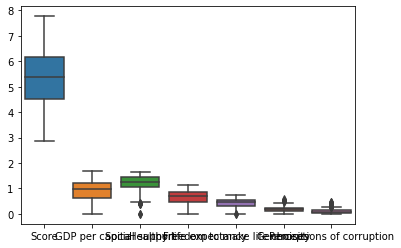

In [ ]:
# 可視化には、「matplotlib」と「seaborn」を用いる
import matplotlib.pyplot as plt
import seaborn as sns

# 箱ひげ図
sns.boxplot(data=df)

<AxesSubplot:>

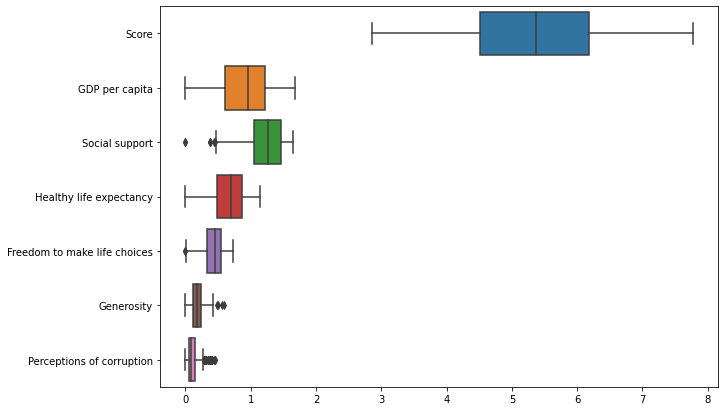

In [ ]:
# 図のサイズを決定
plt.figure(figsize=(10, 7))

# 箱ひげ図
sns.boxplot(data=df, orient='h')

In [ ]:
#スピアマンの順位相関係数（正規分布を仮定していない状態で、相関係数出すから）
df.corr(method='spearman')

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000,0.817,0.806,0.786,0.526,0.092,0.232
GDP per capita,0.817,1.000,0.756,0.842,0.366,-0.025,0.230
Social support,0.806,0.756,1.000,0.685,0.433,0.029,0.128
Healthy life expectancy,0.786,0.842,0.685,1.000,0.309,0.017,0.182
Freedom to make life choices,0.526,0.366,0.433,0.309,1.000,0.316,0.410
Generosity,0.092,-0.025,0.029,0.017,0.316,1.000,0.288
Perceptions of corruption,0.232,0.230,0.128,0.182,0.410,0.288,1.000


In [ ]:
# 正規分布だったらピアソンの相関係数が一般的
df.corr(method='pearson')

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000,0.800,0.771,0.758,0.546,0.107,0.395
GDP per capita,0.800,1.000,0.741,0.829,0.358,-0.046,0.309
Social support,0.771,0.741,1.000,0.671,0.418,-0.014,0.200
Healthy life expectancy,0.758,0.829,0.671,1.000,0.302,0.001,0.294
Freedom to make life choices,0.546,0.358,0.418,0.302,1.000,0.275,0.443
Generosity,0.107,-0.046,-0.014,0.001,0.275,1.000,0.345
Perceptions of corruption,0.395,0.309,0.200,0.294,0.443,0.345,1.000


<AxesSubplot:>

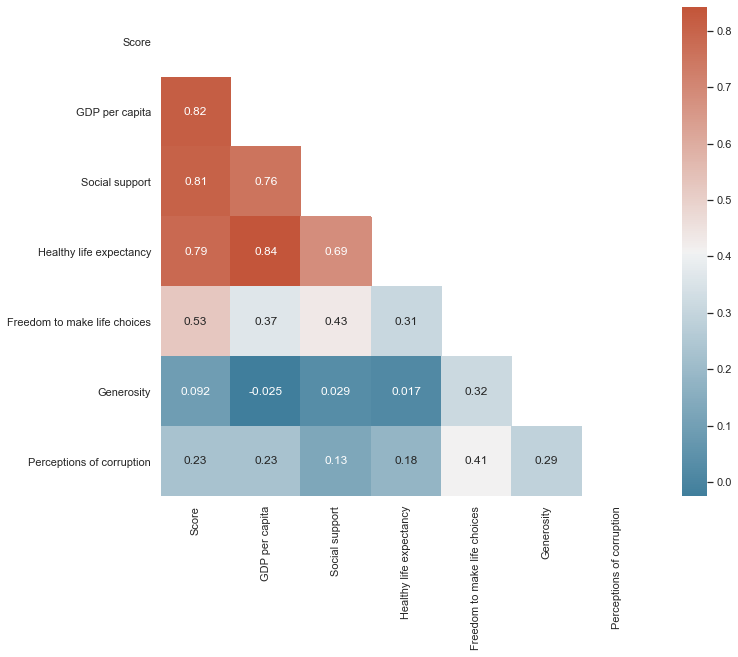

In [ ]:
# デザイン設定
sns.set_theme(style="white")

# 出力した相関係数一覧をcorrに代入
corr = df.corr(method='spearman')

# 下記はきれいに表示するためのカスタマイズなので特別期にしなくてよい
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 可視化
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap)

<AxesSubplot:>

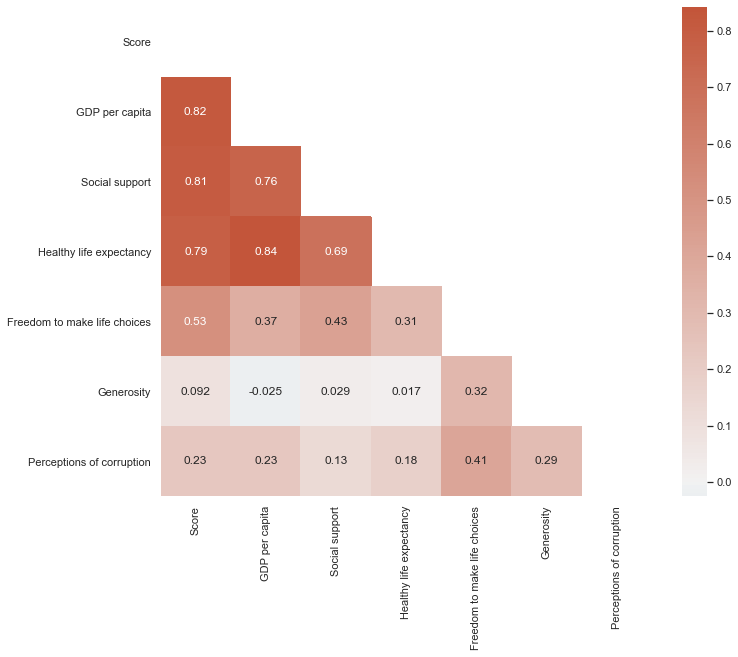

In [ ]:
# デザイン設定
sns.set_theme(style="white")

# 出力した相関係数一覧をcorrに代入
corr = df.corr(method='spearman')

# 下記はきれいに表示するためのカスタマイズなので特別期にしなくてよい
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 可視化
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, center=0)

<AxesSubplot:>

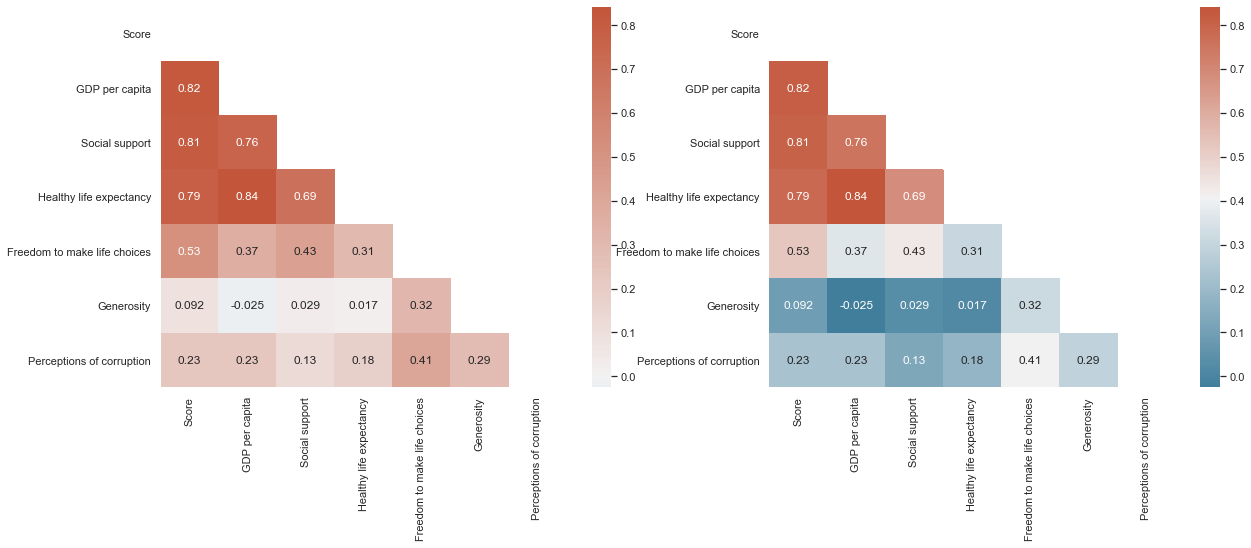

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, center=0, ax=ax1)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, ax=ax2)